<a href="https://colab.research.google.com/github/zahraa57/Deep-Learning-CV/blob/main/Assignment_2_CIFAR_10_with_ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10 .load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# input array
train_arr =  train_labels.flatten()
df=pd.DataFrame( data=train_arr ,columns=["train"])
df.head()
df_sorted=pd.DataFrame(df.sort_values(by=["train"]))
test_arr=test_labels.flatten()
df1=pd.DataFrame( data=test_arr ,columns=["test"])
df_sorted1=pd.DataFrame(df1.sort_values(by=["test"]))
df.head()


train
0      6
1      9
2      9
3      4
4      1

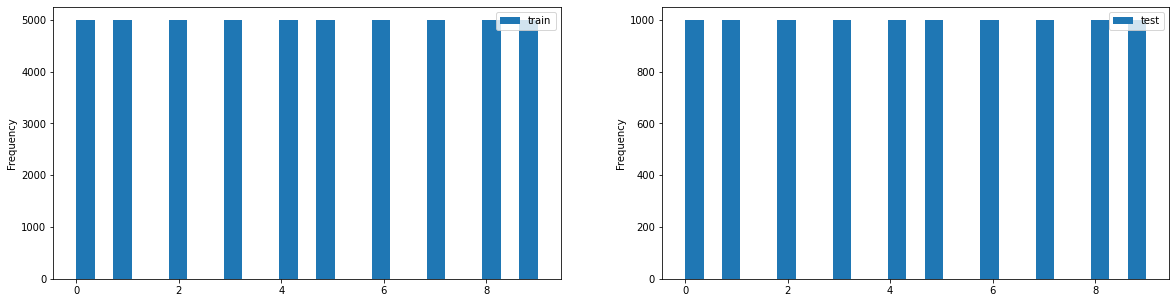

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))
#plot 1:

df_sorted.plot.hist(by="train",bins=25,ax=axes[0])
#plot 2:

df_sorted1.plot.hist(by="test",bins=25,ax=axes[1])

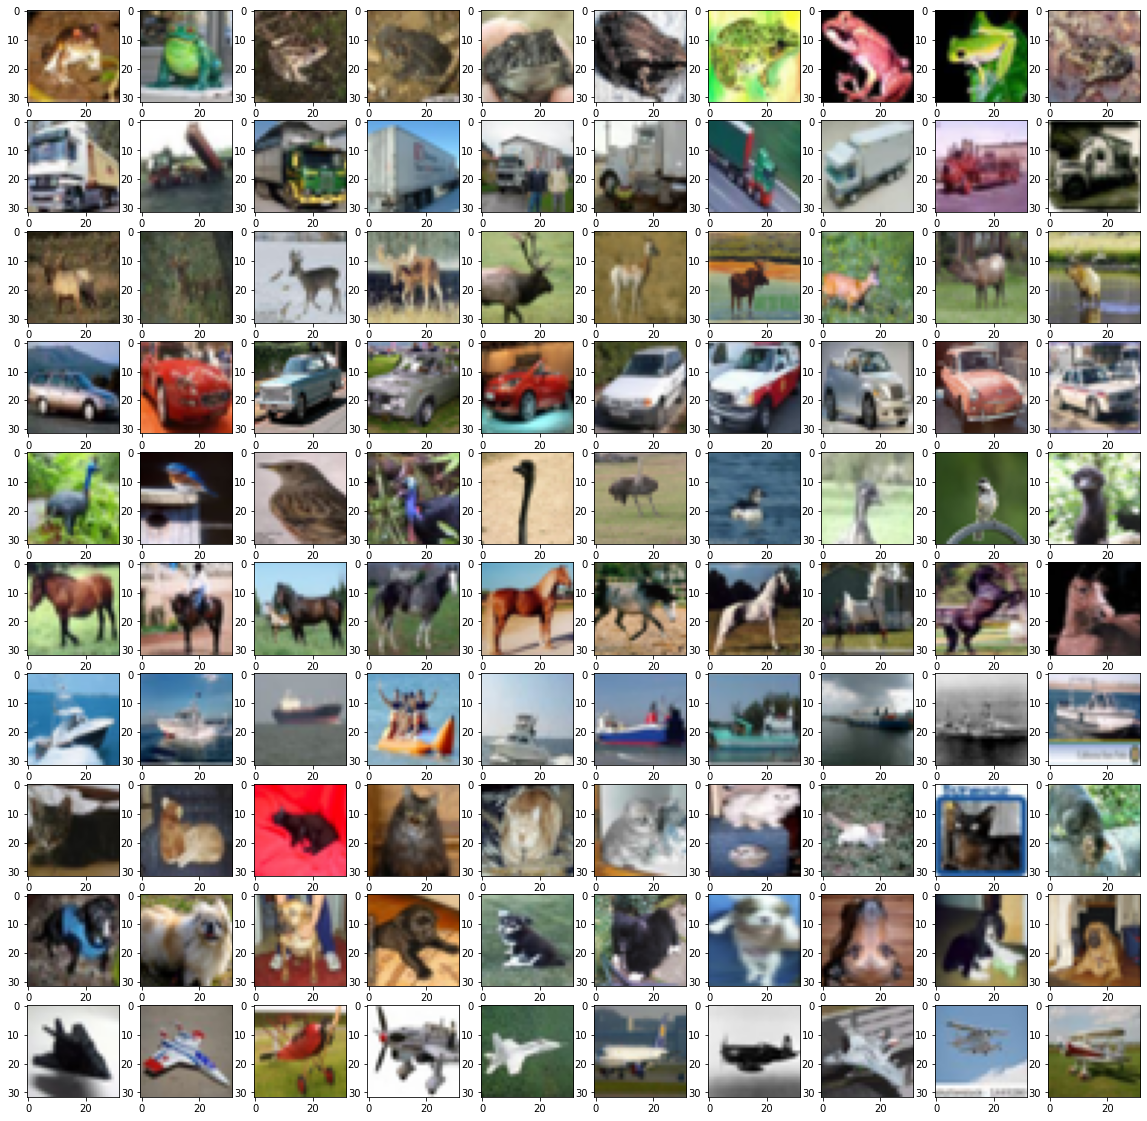

In [ ]:
c=1
fig = plt.figure(figsize=(20,20))
for i in  df['train'].unique():
  idx=np.array(list(np.where(df['train']==i))).flatten()[:10]
  for l in range(10):
    ax1 = fig.add_subplot(10,10,c)
    ax1.imshow(train_images[idx[l]])
    c=c+1 

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_images = train_images.reshape((50000, 32 , 32,3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32,32, 3))
test_images = test_images.astype('float32') / 255

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
Total params: 223,232
Trainable params: 223,232
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 16s 6ms/step - loss: 1.5732 - accuracy: 0.4311
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 1.1000 - accuracy: 0.6118
Epoch 3/5
782/782 [==============================] - 5s 6ms/step - loss: 0.8964 - accuracy: 0.6866
Epoch 4/5
782/782 [==============================] - 5s 6ms/step - loss: 0.7580 - accuracy: 0.7378
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 0.6463 - accuracy: 0.7756


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.8762 - accuracy: 0.7121


In [ ]:

test_acc

0.7121000289916992